In [ ]:
!pip install mne

Imports

In [ ]:
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import mne
from mne.datasets import sample
from mne.io import Raw
import matplotlib.pyplot as plt
import csv

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import .bdf file as raw object

In [ ]:
def import_file(link):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    fluff, id = link.split('=')
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile('Filename.bdf')
    raw = mne.io.read_raw_edf('Filename.bdf',preload=True)
    return raw

Import Data and plot it

*Copy the shareable link from drive and paste it here

Extracting EDF parameters from /content/Filename.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...


<ipython-input-26-1cdf79e04085>:9: DeprecationWarning: The use of read_raw_edf for BDF files is deprecated. Please use read_raw_bdf instead.
  raw = mne.io.read_raw_edf('Filename.bdf',preload=True)


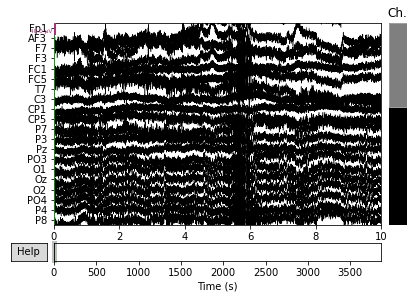

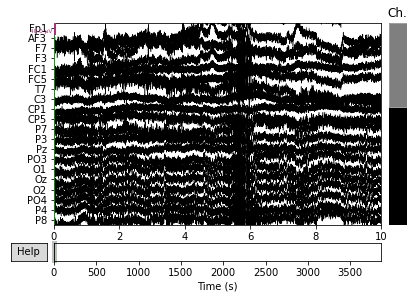

In [ ]:
raw = import_file('https://drive.google.com/open?id=1wlkDXEDFTKu3C_zZFK_6mss5W8BTp8pt')
raw.plot(block=True)

Implement notch filter

frequency = 50Hz

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3379 samples (6.600 sec)



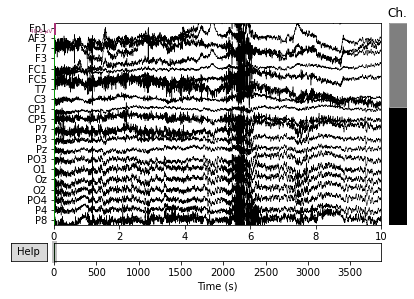

Effective window size : 4.000 (s)


<ipython-input-13-3062329f176f>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


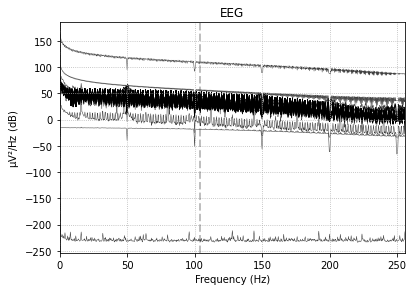

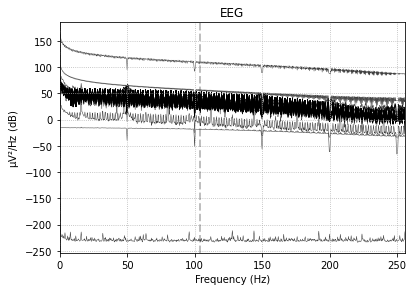

In [ ]:
raw.notch_filter(np.arange(50, 251, 50))
raw.plot(block=True)
raw.plot_psd()

Imolement IIR Band pass filter 

Frequency rangeL 4:45 Hz

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 45.00 Hz: -6.02, -6.02 dB



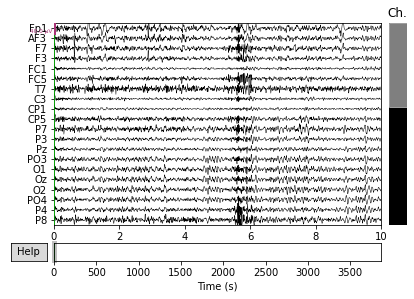

Effective window size : 4.000 (s)


<ipython-input-14-2c51b00bd5f4>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


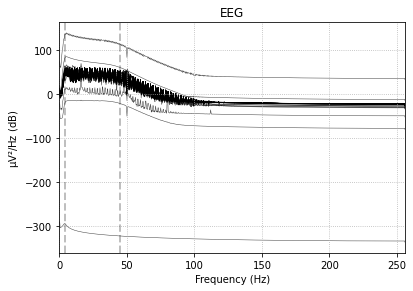

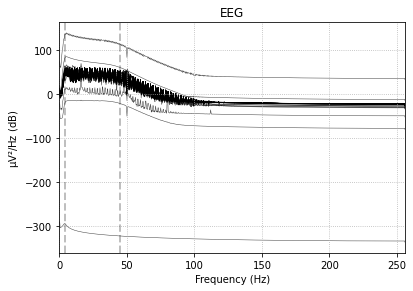

In [ ]:
raw.filter(4, 45, fir_design='firwin', method='iir')
raw.plot(block=True)
raw.plot_psd()

Common reference subtraction

'Status' electrod was assumed as common reference 

EEG channel type selected for re-referencing
Applying a custom EEG reference.


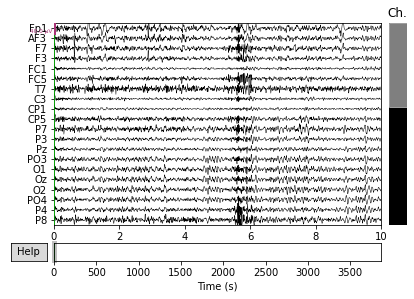

Effective window size : 4.000 (s)


<ipython-input-15-cc76bdb2038a>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


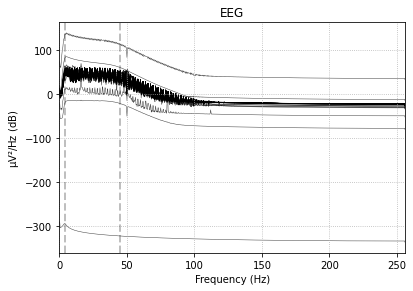

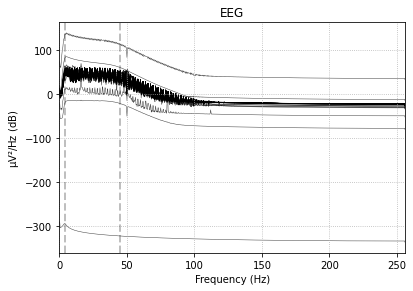

In [ ]:
mne.set_eeg_reference(raw, ref_channels=['Status'], copy=True, projection=False, ch_type='auto', verbose=None)
raw.plot(block=True)
raw.plot_psd()

Downsample to 128 Hz

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
13760 events found
Event IDs: [1 2 3 4 5 6 7]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
298 events found
Event IDs: [1 2 3 4 5 6 7]


<ipython-input-16-6b5980f5696f>:1: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
  raw.resample(128, npad="auto")  # set sampling frequency to 100Hz


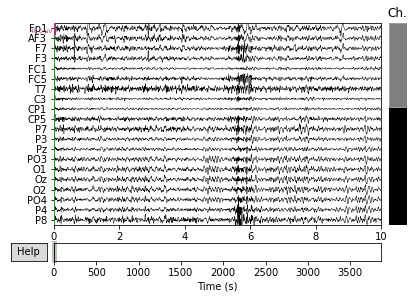

Effective window size : 16.000 (s)


<ipython-input-16-6b5980f5696f>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


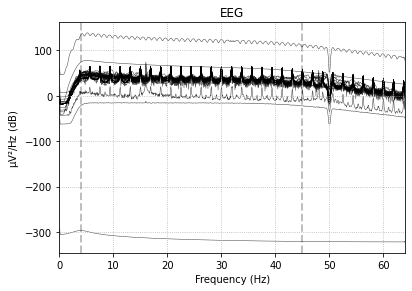

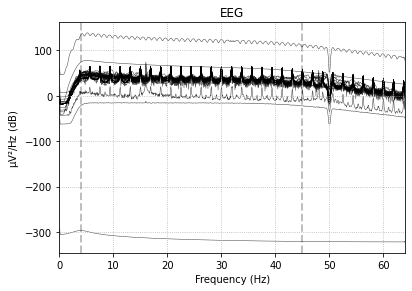

In [ ]:
raw.resample(128, npad="auto")  # set sampling frequency to 100Hz
raw.plot(block=True)
raw.plot_psd()

Pick 32 EEG channels and eliminate EOG and unused channels

In [ ]:
chaiannel = raw.ch_names[0:32]
raw.pick(channel)

<RawEDF | Filename.bdf, 32 x 495232 (3869.0 s), ~121.0 MB, data loaded>

Convert final data  and lables to array and save it in drive as csv file

In [ ]:
data=raw._data
np.savetxt("/content/drive/My Drive/BCI Emotion detection/DEAP/Our_preprocess/S01_data.csv", data, delimiter=",")
with open("/content/drive/My Drive/BCI Emotion detection/DEAP/Our_preprocess/S01_label.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(channel)